Best model accuracy: 65.36312849162012%
This model accuracy: 65.36%


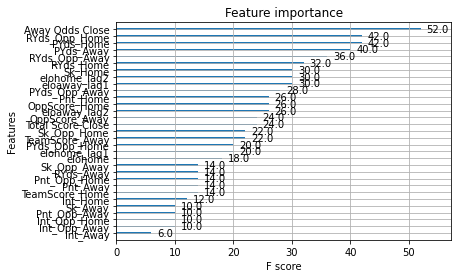

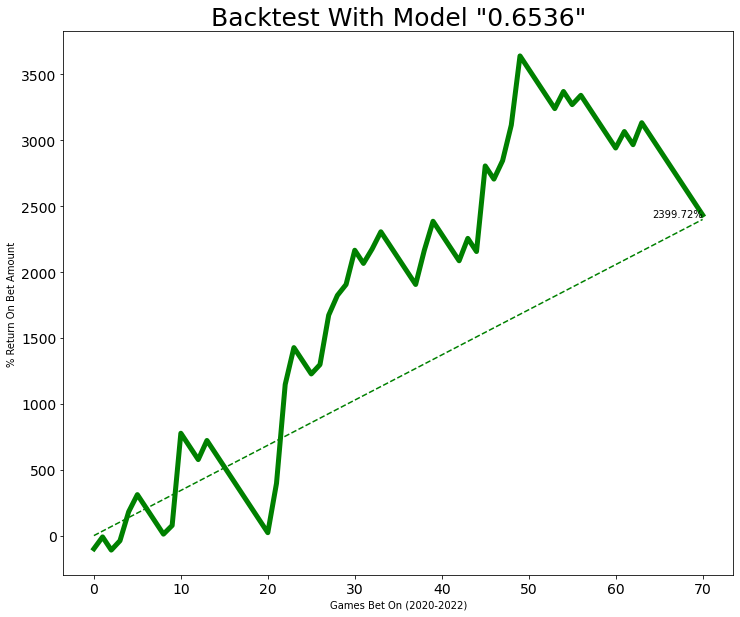

In [4]:
from matplotlib import pyplot as plt
import nfl_betting as nfl
import pandas as pd
import numpy as np

df = pd.read_csv('data/datalagged.csv')
feats = nfl.feats
nfl.__train(df,feats,testyears=[2020,2021,2022],purpose='backtest',iterations=1,num_round=30,max_depth=4,eta=.3)

test = nfl.findev(df.loc[df['season'].isin([2020,2021,2022])],feats,purpose='backtest',thresh=.5)
mean = test['winnings'].mean()
plt.figure(figsize=(12,10))
plt.plot(test.index,test.index*mean*100,color='green',linestyle='--')
plt.plot(test['winnings'].cumsum()*100,color='green',linewidth=5)
plt.tick_params(labelsize=14)
plt.text((test.index[-1]),(test.index[-1]*mean*100),f"{round(test.index[-1]*mean*100,2)}%",horizontalalignment='right',verticalalignment='bottom',rotation=0,rotation_mode='anchor')
plt.title('Backtest With Model "0.6536"',fontsize = 25)
plt.xlabel('Games Bet On (2020-2022)')
plt.ylabel('% Return On Bet Amount')
plt.show()